# Overview

Welcome to aurora-asi-lib. This introductary notebook guides you though some of the aurora-asi-lib (imported as asilib) functionality.

In [10]:
from datetime import datetime
import numpy as np
import cartopy.crs as ccrs  # A dependency that is optional for asilib, but not for this notebook.
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import asilib

plt.style.use('dark_background')

First of all, you should know where the data and movies are saved to. This information is in `asilib.config` and can be changed with `python3 -m asilib config` to configure asilib.

In [11]:
asilib.config

{'ASILIB_DIR': PosixPath('/home/mike/research/aurora-asi-lib/asilib'),
 'ASI_DATA_DIR': PosixPath('/media/mike/2D6742F55A2E0A82/asilib-data')}

As you can guess, `asilib.config['ASILIB_DIR']` is the directory where this code resides, `asilib.config['ASI_DATA_DIR']` is the directory where the data is saved to.

# Plot a single image

Since we sold you on easily downloading, loading, plotting and analyzing auroral images with `asilib`, lets begin with a plot of an omega band studied in:

Liu, J., Lyons, L. R., Archer, W. E., Gallardo-Lacourt, B., Nishimura, Y., Zou, 
Y., … Weygand, J. M. (2018). Flow shears at the poleward boundary of omega bands 
observed during conjunctions of Swarm and THEMIS ASI. Geophysical Research Letters, 
45, 1218– 1227. https://doi.org/10.1002/2017GL076485

We can plot a fisheye lens image using `asilib.plot_image`.

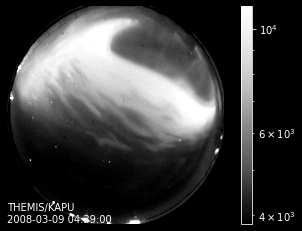

In [18]:
asi_array_code = 'THEMIS'
location_code = 'KAPU'
time = datetime(2008, 3, 9, 4, 39, 00)  # You can supply a datetime object or a ISO-formatted time string.

image_time, image, ax, im = asilib.plot_image(asi_array_code, location_code, time, 
                    color_norm='log', color_map='auto')
plt.colorbar(im)
ax.axis('off');

It is also easy to map the ASI fisheye lens image to a geographic map using `asilib.plot_map`. In the code box below, the first code section makes a custom map that shows up well in notebook with a black background.

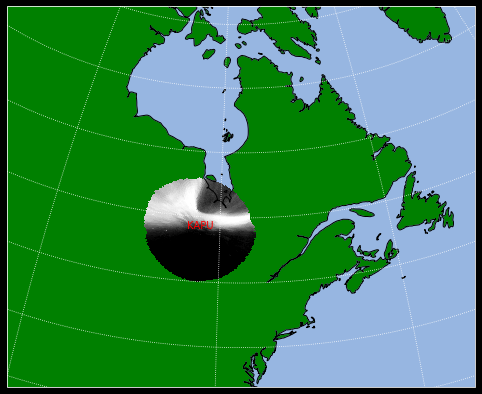

In [19]:
# asilib.plot_map() has a similar default subplot map. 
fig = plt.figure(figsize=(10, 7))
plot_extent = [-100, -55, 35, 65]
central_lon = np.mean(plot_extent[:2])
central_lat = np.mean(plot_extent[2:])
projection = ccrs.Orthographic(central_lon, central_lat)
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='green')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(linestyle=':')

asi_array_code = 'THEMIS'
location_code = 'KAPU'
time = '2008-03-09T04:39:00'
map_alt_km = 110

asilib.plot_map(asi_array_code, location_code, time, map_alt_km, ax=ax);

Notice that you did not need to explicitly download or load the data---`asilib` takes care of that for you. 

Now what if you need to analyze the image? `asilib.plot_image` returns the time stamp of the image `image_time` and the 2-d image np.array `image`.

In [ ]:
image_time, image

(datetime.datetime(2017, 9, 15, 2, 34, 0, 42000),
 array([[2777, 2739, 2757, ..., 2780, 2756, 2759],
        [2780, 2782, 2807, ..., 2779, 2745, 2765],
        [2752, 2779, 2767, ..., 2776, 2723, 2781],
        ...,
        [2747, 2748, 2770, ..., 2749, 2738, 2762],
        [2759, 2772, 2767, ..., 2739, 2758, 2769],
        [2762, 2756, 2744, ..., 2753, 2742, 2736]], dtype=uint16))

You can also just load that image by using `asilib.load_image()`.

In [21]:
image_time, image = asilib.load_image(asi_array_code, location_code, time=time, force_download=False)

# Plot a Keogram

`asilib.plot_keogram` plots a keogram through the meridian, and using it is as simple as plotting a single image. If you don't specify a `map_alt`, the vertical axis will be pixel number. Note: `asilib.keogram` returns the keogram array that is plotted by `asilib.plot_keogram`.

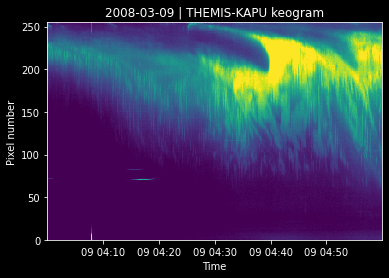

In [29]:
time_range = [datetime(2008, 3, 9, 4, 0, 00), datetime(2008, 3, 9, 5, 0, 0)]
asilib.plot_keogram(asi_array_code, location_code, time_range)
plt.xlabel('Time'); plt.ylabel('Pixel number');

And if you specify a `map_alt` (in kilometers), the vertical axis will be geographic latitude. Note: `asilib` does not support magnetic latitude ([AACGM](http://superdarn.thayer.dartmouth.edu/aacgm.html)) coordinates yet.

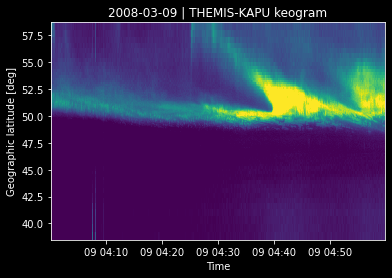

In [30]:
map_alt_km = 110
asilib.plot_keogram(asi_array_code, location_code, time_range, map_alt=map_alt_km)
plt.xlabel('Time'); plt.ylabel('Geographic latitude [deg]');

Simple enough? You can choose any other altitude from the `FULL_MAP_ALTITUDE` key in the skymap calibration data that is described in the following section. If you pick a wrong altitude, `asilib` will give you a helpful error.

In [32]:
try:
    asilib.plot_keogram(asi_array_code, location_code, time_range, map_alt=100)
except AssertionError as err:
    print('AssetionError:', err)

AssetionError: 100 km is not in skymap altitudes: [ 90. 110. 150.] km


# Skymap calibration data
You may wonder how the image's pixel values were mapped to geographic latitude---this is where the skymap files come in. `asilib` also makes this easy and you only need to give it the ASI array code, location code, and the time (so the correct skymap file is loaded).

In [31]:
skymap = asilib.load_skymap(asi_array_code, location_code, time)
skymap.keys()

dict_keys(['GENERATION_INFO', 'SITE_UID', 'IMAGER_UID', 'PROJECT_UID', 'IMAGER_UNIX_TIME', 'SITE_MAP_LATITUDE', 'SITE_MAP_LONGITUDE', 'SITE_MAP_ALTITUDE', 'FULL_ROW', 'FULL_COLUMN', 'FULL_IGNORE', 'FULL_SUBTRACT', 'FULL_MULTIPLY', 'FULL_ELEVATION', 'FULL_AZIMUTH', 'FULL_MAP_ALTITUDE', 'FULL_MAP_LATITUDE', 'FULL_MAP_LONGITUDE', 'FULL_BIN', 'BIN_ROW', 'BIN_COLUMN', 'BIN_ELEVATION', 'BIN_AZIMUTH', 'BIN_MAP_ALTITUDE', 'BIN_MAP_LATITUDE', 'BIN_MAP_LONGITUDE', 'skymap_path'])

The skymap data that `asilib` uses for keograms is the `FULL_MAP_LATITUDE`. Also, to confirm that you loaded the correct skymap file, the `skymap` dictionary contains a `skymap_path` key that points to the local skymap file. 

In [ ]:
skymap['skymap_path']

PosixPath('/media/mike/2D6742F55A2E0A82/asilib-data/themis/skymap/rank/themis_skymap_rank_20150825_vXX.sav')

The possible skymap mapping altitudes (in meters) that you can use in `asilib.plot_keogram` and `asilib.plot_map`.

In [ ]:
skymap['FULL_MAP_ALTITUDE']

array([ 90000., 110000., 150000.], dtype=float32)

# Working with multiple images

Coming soon!

# Basic Movie

Coming soon!

# Satellite conjunction

Coming soon!